In [5]:
import pandas as pd
from sklearn import *

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [4]:
X = df[features]
X.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [6]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
pd.DataFrame(X_std)

,0,1
0,-0.900681,-1.341272
1,-1.143017,-1.341272
2,-1.385353,-1.398138
3,-1.506521,-1.284407
4,-1.021849,-1.341272
...,...,...
145,1.038005,0.819624
146,0.553333,0.705893
147,0.795669,0.819624
148,0.432165,0.933356


Text(0, 0.5, 'PetalLengthCm')

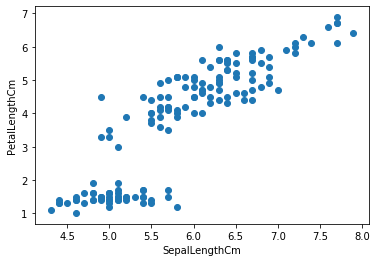

In [13]:
plt.scatter(X.values[:,0], X.values[:,1])
plt.xlabel(features[0])
plt.ylabel(features[1])

In [15]:
kmeans = cluster.KMeans(n_clusters= 3, random_state=1)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [16]:
y_pred = kmeans.predict(X_std)

In [17]:
df["cluster"] = y_pred

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [20]:
df1 = pd.DataFrame(X_std, columns=features)
df1["cluster"] = y_pred
df1.head()

,SepalLengthCm,PetalLengthCm,cluster
0,-0.900681,-1.341272,1
1,-1.143017,-1.341272,1
2,-1.385353,-1.398138,1
3,-1.506521,-1.284407,1
4,-1.021849,-1.341272,1


In [21]:
df1.cluster.value_counts()

1    54
0    53
2    43
Name: cluster, dtype: int64

In [22]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

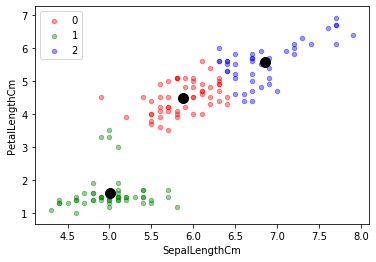

In [34]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i in range(3):
    df_new = df[features][df.cluster == i]
    df_new.plot.scatter(0, 1, color= colors[i]
                        , ax = ax, alpha = 0.4, label = i)
    
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroids = pd.DataFrame(centroids, columns=features)

centroids.plot.scatter(0, 1, color= "black", ax = ax, s = 100)

plt.legend()


In [29]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

In [35]:
import numpy as np

In [42]:
distance = np.zeros(len(df))

for i in range(3):
    X1 = X_std[y_pred == i]
    centroid = kmeans.cluster_centers_[[i],:]
    distance[y_pred == i] = metrics.euclidean_distances(X1, centroid).flatten()

In [41]:
centroid = kmeans.cluster_centers_[[0],:]
centroid

array([[0.03665519, 0.41727267]])

In [46]:
metrics.euclidean_distances(X_std[y_pred == 0], centroid).squeeze()

array([0.82256612, 1.87151686, 1.52895075, 0.83706905, 2.22164375,
       1.397316  , 1.3695413 , 1.0426829 , 1.89095047, 1.64086565,
       1.52976697, 1.00219332, 1.7952908 , 1.24027277, 1.27997925,
       0.77551097, 1.0426829 , 0.90973714, 1.20400212, 1.83068849,
       1.92827804, 1.95851927, 1.59465763, 1.07322837, 1.86816204,
       1.20400212, 0.94767674, 1.73790767, 1.87151686, 1.77449224,
       1.07075787, 1.56151409, 1.71133024, 1.60433834, 1.60433834,
       1.07489446, 1.63265837, 1.30938994, 2.449053  , 1.43991442,
       1.30938994, 1.08870761, 1.57099834, 0.77551097, 0.90905835,
       0.9939418 , 0.72664958, 0.91880809, 1.12765985, 1.30938994,
       0.74932285, 0.80311806, 1.19099913])

In [47]:
distance

array([0.16059913, 0.1704543 , 0.40720911, 0.49456242, 0.11287924,
       0.48143656, 0.50415607, 0.05621711, 0.74234021, 0.13954681,
       0.48118773, 0.24906952, 0.27336957, 0.90061665, 0.98887922,
       0.84329253, 0.50712105, 0.16059913, 0.84343454, 0.12732133,
       0.48143656, 0.12732133, 0.59763948, 0.12825855, 0.30248686,
       0.00681342, 0.00681342, 0.24212473, 0.26116229, 0.37023666,
       0.24906952, 0.48118773, 0.24212473, 0.60961182, 0.13954681,
       0.2265098 , 0.6226358 , 0.13954681, 0.75307222, 0.12732133,
       0.16967762, 0.63560073, 0.75307222, 0.00681342, 0.20629943,
       0.27336957, 0.11444117, 0.50415607, 0.36111128, 0.11287924,
       0.52236774, 0.6378604 , 0.38291965, 0.53228383, 0.70069219,
       0.21037292, 0.52998652, 0.97618497, 0.63284247, 0.88296901,
       1.08152239, 0.1693573 , 0.31919118, 0.29865229, 0.60617332,
       0.69097379, 0.33152478, 0.24032281, 0.3955335 , 0.47264526,
       0.17779352, 0.39202591, 0.56627416, 0.29865229, 0.64716

In [48]:
df["distance"] = distance

In [49]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0.160599
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0.170454
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0.407209
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0.494562
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0.112879


In [50]:
mu = df.distance.mean()
sigma = df.distance.std()

In [51]:
df["anamoly"] = np.where(df["distance"] >(mu + 3 * sigma), 1, 0)

In [52]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,anamoly
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0.160599,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0.170454,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0.407209,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0.494562,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0.112879,0


In [53]:
df[df.anamoly == 1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,anamoly
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2,1.348258,1


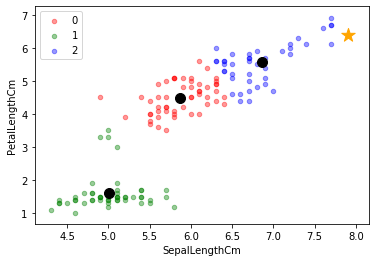

In [56]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i in range(3):
    df_new = df[features][df.cluster == i]
    df_new.plot.scatter(0, 1, color= colors[i]
                        , ax = ax, alpha = 0.4, label = i)
    
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroids = pd.DataFrame(centroids, columns=features)

centroids.plot.scatter(0, 1, color= "black", ax = ax, s = 100)

plt.legend()


df[df.anamoly == 1][features].plot.scatter(0, 1, color = "orange"
                    , s = 200, marker = "*", ax = ax)



In [57]:
np.percentile(df.distance, [99])

array([1.23918885])

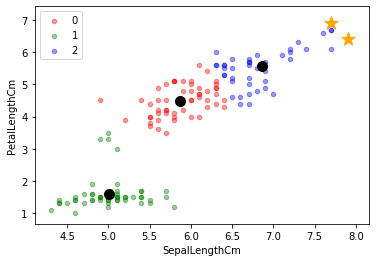

In [59]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i in range(3):
    df_new = df[features][df.cluster == i]
    df_new.plot.scatter(0, 1, color= colors[i]
                        , ax = ax, alpha = 0.4, label = i)
    
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroids = pd.DataFrame(centroids, columns=features)

centroids.plot.scatter(0, 1, color= "black", ax = ax, s = 100)

plt.legend()

df["anamoly"] = np.where(df["distance"] > 1.23918885, 1, 0)

df[df.anamoly == 1][features].plot.scatter(0, 1, color = "orange"
                    , s = 200, marker = "*", ax = ax)



In [60]:
sm = pd.read_csv("/data/snsdata.csv")
sm.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [61]:
sm.shape

(30000, 40)